In [131]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit as fit
import scipy.sparse as sci_sparse

import os
import sys

In [132]:
date = '2021-10-22' # NP in water
#date = '2021-10-15' # NP in dmso-water 
datadir = './tmp/'+date+'/' # data directory

In [133]:
sample = '100NP_water_2' # NP in water
#sample = '100NP_dmso'

scans =  range(252,352)      # scans to run -- NP in water in focus
#scans = range(7587,7597)    # scans to run -- NP in water/DMSO in focus
#scans = range(7607,7617)    # scans to run -- NP in water/DMSO 1000um out
#scans = range(7637,7667)    # scans to run -- NP in water/DMSO 2000um out

exp_time = 1e-5  # water     # exposure time [s]
#exp_time = 1e-4 # dmso-water

run_time = 1 # water         # total run time [s]
#run_time = 30 # dmso-water  

downsample = 10              # pixel binning

filename = str(scans)+'_'+str(downsample)+'x'+str(downsample)+'_'+str(exp_time)+'s'

ttc_av = np.load(datadir+sample+'_ttc_av_'+filename+'.npy')     # average ttc
ttc_av0 = np.load(datadir+sample+'_ttc_av0_'+filename+'.npy')   # average within each run
ttc_av00 = np.load(datadir+sample+'_ttc_av00_'+filename+'.npy') # first ttc (single ttc)
ttc_av10 = np.load(datadir+sample+'_ttc_av10_'+filename+'.npy')  # average of every 10th TTC 
ttc_av100 = np.load(datadir+sample+'_ttc_av100_'+filename+'.npy')  # average of every 100th TTC 
ttc_av1000 = np.load(datadir+sample+'_ttc_av1000_'+filename+'.npy')  # average of every 1000th TTC 
q = np.load(datadir+sample+'_q_ttc_'+filename+'.npy') # q values in 1/Å
n_frames = len(ttc_av[0,0,:]) # no of frames (time delay points) in a ttc

q = q*10 # 1/Å to 1/nm

print(ttc_av.shape, q.shape, q, n_frames) 

(4, 100, 100) (4,) [0.05922907 0.06619719 0.07316531 0.08013342] 100


### max acquisition time

In [134]:
n_frames = 100                       # no of frames per ttc
n_ttc = run_time/exp_time/n_frames   # no of ttc:s per run
n_runs = scans[-1]-scans[0]+1        # no of runs included

N_ttc=n_runs*n_ttc                   # total no of ttc:s
max_acq_time = N_ttc*exp_time        # total acquisition time [s]

print(n_runs, n_ttc)
print(N_ttc)
print(max_acq_time)

100 999.9999999999999
99999.99999999999
0.9999999999999999


# plot ttc for all q

<ipython-input-135-3d83f0459fa0>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ttc_av_plot[ind] = 0


1.0111417
1.0279329
1.0339873
1.0208101


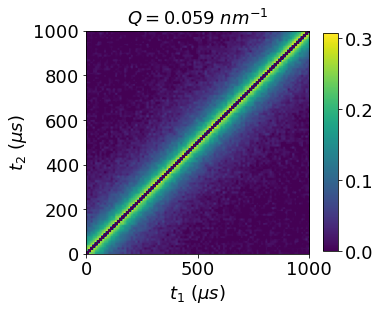

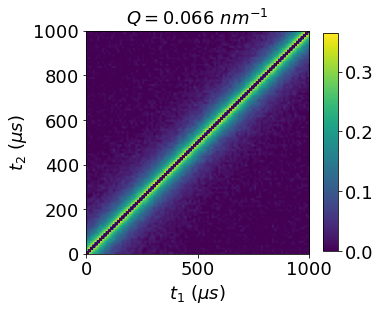

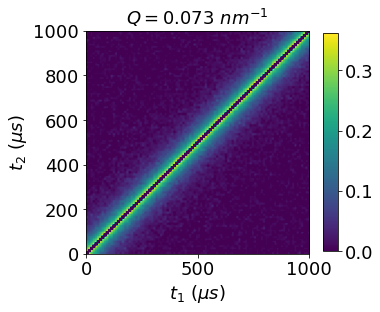

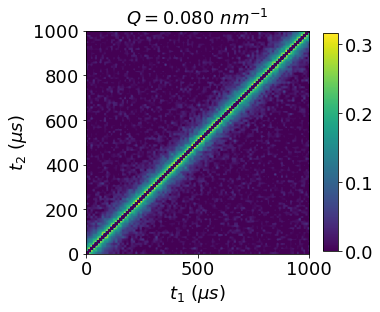

In [135]:
ttc_av_plot = ttc_av # choose type of ttc

for i in range(len(q)):

    # mask diagonal/high values
    ttc_av_plot[i][np.diag_indices_from(ttc_av_plot[i])] = 0
    ind = [ttc_av_plot > 2]
    ttc_av_plot[ind] = 0
 
    bg = np.mean(ttc_av_plot[i,90:100,0:10][ttc_av_plot[i,90:100,0:10] != 0]) # mean long-time background 
    print(bg)
    
    factor = 1 # reducing factor to display a smaller part of the ttc
    dt = 0     # time offset for display a smaller part of the ttc

    # plot masked average ttc
    plt.figure(figsize=(5,5))
    plt.imshow(ttc_av_plot[i]-bg, origin='lower', extent=[0, n_frames*exp_time/1e-6, 0, n_frames*exp_time/1e-6]) #, interpolation='gaussian') 
    plt.title('$Q = %.3f ~nm^{-1}$' %q[i], size=18)
    plt.xlabel('$t_1 ~(\mu s)$', size=18)
    plt.ylabel('$t_2 ~(\mu s)$', size=18)
    plt.xlim([0+dt, n_frames*exp_time/1e-6/factor + dt])
    plt.ylim([0+dt, n_frames*exp_time/1e-6/factor + dt])
    plt.clim([0, np.max(ttc_av_plot[i])-bg])
    plt.tick_params(labelsize=18)
    cbar = plt.colorbar(**dict(pad=0.05, shrink=0.8, aspect=15))
    cbar.ax.tick_params(labelsize=18) 

plt.tight_layout

#plt.savefig('ttc_'+sample+'_'+str(scans)+'_'+str(downsample)+'x'+str(downsample)+'_'+str(exp_time)+'s.png', dpi=300, bbox_inches='tight')# save plot

plt.show()

# plot ttc for single q

<ipython-input-136-fe3917c50bee>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ttc_av_plot[ind] = 0


1.0111417


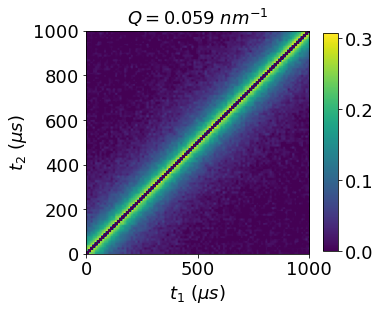

In [136]:
qval=0 # choose q

for i in [qval]:

    # mask high values
    ttc_av_plot[i][np.diag_indices_from(ttc_av_plot[i])] = 0
    ind = [ttc_av_plot > 2]
    ttc_av_plot[ind] = 0
 
    bg = np.mean(ttc_av_plot[i,90:100,0:10][ttc_av_plot[i,90:100,0:10] != 0]) # mean long-time background 
    print(bg)
    
    factor = 1

    # plot masked average ttc
    plt.figure(figsize=(5,5))
    plt.imshow(ttc_av_plot[i]-bg, origin='lower', extent=[0, n_frames*exp_time/1e-6, 0, n_frames*exp_time/1e-6]) #, interpolation='gaussian') 
    plt.title('$Q = %.3f ~nm^{-1}$' %q[i], size=18)
    plt.xlabel('$t_1 ~(\mu s)$', size=18)
    plt.ylabel('$t_2 ~(\mu s)$', size=18)
    plt.xlim([0, n_frames*exp_time/1e-6/factor])
    plt.ylim([0, n_frames*exp_time/1e-6/factor])
    plt.clim([0, np.max(ttc_av_plot[i])-bg])
    plt.tick_params(labelsize=18)
    cbar = plt.colorbar(**dict(pad=0.05, shrink=0.8, aspect=15))
    cbar.ax.tick_params(labelsize=18) 

plt.tight_layout

#plt.savefig('ttc_'+str(i)+'_'+sample+'_'+str(scans)+'_'+str(downsample)+'x'+str(downsample)+'_'+str(exp_time)+'s.png', dpi=300, bbox_inches='tight')# save plot

plt.show()

### zoom in

1.0111417


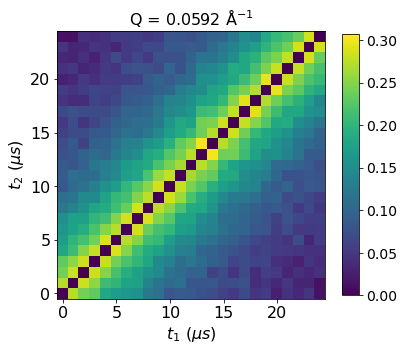

In [137]:
u=0 # start time
width=25 # time width

for i in [qval]:
 
    bg = np.mean(ttc_av_plot[i,90:100,0:10][ttc_av_plot[i,90:100,0:10] != 0]) # mean long-time background 
    print(bg)
    
    factor = 1

    # plot masked average ttc
    plt.figure(figsize=(6,6))
    plt.imshow(ttc_av_plot[i,u:u+width,u:u+width]-bg, origin='lower') #, interpolation='gaussian') 
    plt.title('Q = %.4f Å$^{-1}$' %q[i], size=16)
    plt.xlabel('$t_1 ~(\mu s)$', size=16)
    plt.ylabel('$t_2 ~(\mu s)$', size=16)
    #plt.xlim([0, n_frames*exp_time/1e-6/factor])
    #plt.ylim([0, n_frames*exp_time/1e-6/factor])
    plt.clim([0, np.max(ttc_av_plot[i])-bg])
    plt.tick_params(labelsize=16)
    cbar = plt.colorbar(**dict(pad=0.05, shrink=0.8, aspect=15))
    cbar.ax.tick_params(labelsize=14) 

plt.tight_layout
plt.show()

[  0.30415962 193.78804826] 1.470967613702473e-14
[  0.31053427 188.77858083] 1.5100015142627437e-14
[  0.31033476 187.88530321] 1.5171806311911058e-14
[  0.30787027 188.60521455] 1.5113895105349096e-14
[  0.31066721 188.5445337 ] 1.5118759335826934e-14


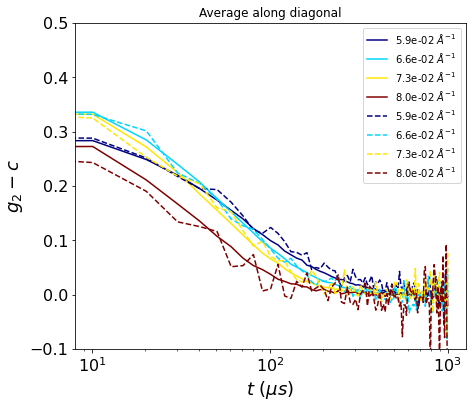

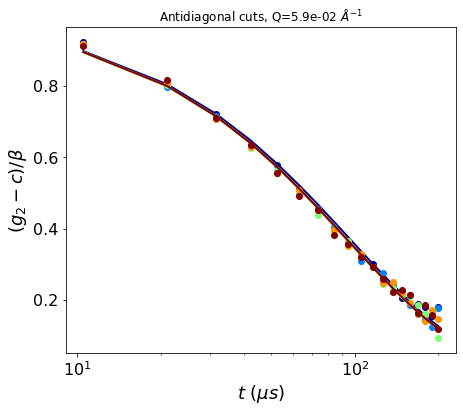

In [138]:
from scipy.optimize import curve_fit

def exponential(x, a , b):
    return np.abs(a)*np.exp(-2*x/np.abs(b)) #+ baseline

def stretched_exponential(x, a , b, c):
    return np.abs(a)*np.exp(-2*(x/np.abs(b))**c) #+ baseline

fit_func = exponential


#######################
# diagonal average
#######################

t = np.linspace(0, n_frames*exp_time/1e-6, n_frames)
col = plt.cm.jet(np.linspace(0,1,len(q)))
plt.figure(figsize=(7,6))

# average ttc
for i in range(len(q)):
    bg = np.mean(ttc_av[i,90:100,0:10][ttc_av[i,90:100,0:10] != 0]) # mean long-time background
    g2 = np.zeros(n_frames)
    for k in range(n_frames):
        g2[k] = np.mean(np.diagonal(ttc_av[i], offset=k))
    
    plt.plot(t, g2-bg, '-', color=col[i], label=r'%.1e $\AA^{-1}$' %q[i])
    plt.xlabel('$t ~(\mu s)$', size=18)
    plt.ylabel(r'$g_2-c$', size=18)
    plt.title('Average along diagonal')
    plt.xscale('log')
    plt.tick_params(labelsize=16)
    plt.legend()
    plt.ylim([-0.1,0.5])

# another ttc with less statistics
for i in range(len(q)):
    bg = np.mean(ttc_av100[i,90:100,0:10][ttc_av100[i,90:100,0:10] != 0]) # mean long-time background
    g2 = np.zeros(n_frames)
    for k in range(n_frames):
        g2[k] = np.mean(np.diagonal(ttc_av100[i], offset=k))
    
    plt.plot(t, g2-bg, '--', color=col[i], label=r'%.1e $\AA^{-1}$' %q[i])
    plt.legend()
    

#########################
# anti-diagonal cuts
#########################

# average ttc:    
i=0 # choose q
width=20
step=20
tt = np.linspace(0, width*exp_time/1e-6, width)
col = plt.cm.jet(np.linspace(0,1,n_frames//step))
bg = np.mean(ttc_av[i,90:100,0:10][ttc_av[i,90:100,0:10] != 0]) # mean long-time background

plt.figure(figsize=(7,6)) 
c=0
for u in range(0, n_frames, step):
    
    box = ttc_av[i,u:u+width,u:u+width] # small moving box along main diagonal (moving in steps of 'step')
    
    g2 = np.zeros(width)
    for k in range(width):
        g2[k] = np.mean(np.diagonal(box, offset=k))
    g2fit = g2[1:]-bg
    tfit = tt[1:]
    popt, pcov = curve_fit(fit_func, tfit[~np.isnan(g2fit)], g2fit[~np.isnan(g2fit)], p0=[0.1, 100], bounds=((0,0),(np.inf,np.inf)))
    perr = np.sqrt(np.diag(pcov))
    D = 1/(popt[1]*q[i]**2)*1e-20*1e6 # diffusion coefficient, m^2/s
    print('Fit result:', popt, 'D:', D)
    
    plt.plot(tfit, g2fit/popt[0], 'o', color=col[c], label=r'%.d $\mu s$' %np.mean(t[u:u+width]))
    plt.plot(tfit, fit_func(tfit, *popt)/popt[0], color=col[c], linestyle='-', lw=2)
    c+=1

plt.xlabel('$t ~(\mu s)$', size=18)
plt.ylabel(r'$(g_2-c)/\beta$', size=18)
plt.title(r'Antidiagonal cuts, Q=%.1e $\AA^{-1}$' %q[i])
plt.xscale('log')
plt.tick_params(labelsize=16)

plt.show()

# Fit tcc

tau: 173.81162156304805 us


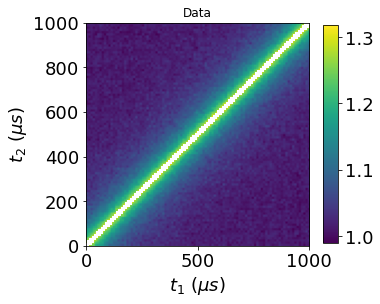

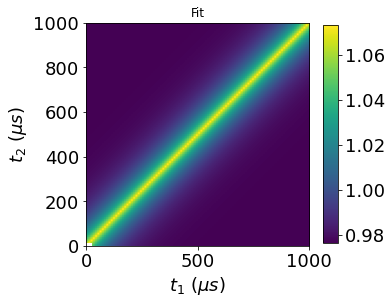

In [139]:
i=0 # choose q

ttc_fit = ttc_av[i]

bg = np.mean(ttc_fit[90:100,0:10][ttc_fit[90:100,0:10] != 0]) # mean long-time background

def expfun(x, a, b, baseline):
    return np.abs(a)*np.exp(-2*np.abs(x[0]-x[1])/np.abs(b)) + baseline

nx, ny = (n_frames, n_frames)
x = np.linspace(0, n_frames*exp_time/1e-6, nx)
y = np.linspace(0, n_frames*exp_time/1e-6, ny)
X, Y = np.array(np.meshgrid(x, y))
size = X.shape

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = np.vstack((X.ravel(), Y.ravel()))
np.fill_diagonal(xdata, np.nan)
np.fill_diagonal(ttc_fit, np.nan)
ydata = ttc_fit.ravel()

fit_func = expfun
popt, pcov = curve_fit(fit_func, xdata[~np.isnan(xdata)], ydata[~np.isnan(ydata)], p0=[0.1, 180, bg], bounds=((0,0,0),(np.inf,np.inf,np.inf)))
print('tau:',popt[1], 'us')

z_fit = fit_func(xdata, *popt)
Z_fit = z_fit.reshape(size)

plt.figure(figsize=(5,5))
plt.imshow(ttc_fit, origin='lower', extent=[0, n_frames*exp_time/1e-6, 0, n_frames*exp_time/1e-6]) 
plt.xlabel('$t_1 ~(\mu s)$', size=18)
plt.ylabel('$t_2 ~(\mu s)$', size=18)
plt.xlim([0, n_frames*exp_time/1e-6/factor])
plt.ylim([0, n_frames*exp_time/1e-6/factor])
#plt.clim([0, 0.12])
plt.tick_params(labelsize=18)
cbar = plt.colorbar(**dict(pad=0.05, shrink=0.8, aspect=15))
cbar.ax.tick_params(labelsize=18) 
plt.title('Data')

plt.figure(figsize=(5,5))
plt.imshow(Z_fit, origin='lower', extent=[0, n_frames*exp_time/1e-6, 0, n_frames*exp_time/1e-6]) 
plt.xlabel('$t_1 ~(\mu s)$', size=18)
plt.ylabel('$t_2 ~(\mu s)$', size=18)
plt.xlim([0, n_frames*exp_time/1e-6/factor])
plt.ylim([0, n_frames*exp_time/1e-6/factor])
plt.tick_params(labelsize=18)
cbar = plt.colorbar(**dict(pad=0.05, shrink=0.8, aspect=15))
cbar.ax.tick_params(labelsize=18) 
plt.title('Fit')

plt.show()

# SNR analysis

5 0.18786200000000003 0.27014984208354015 1.4934632609370027e-12
[0.78932926]
29 0.12073206896551726 0.325593239062213 1.6285909672489586e-12
[0.55446706]
35 0.08038314285714286 0.32432893682527775 1.6445222756325188e-12
[0.65622519]
31 0.04904322580645162 0.2665029261777981 1.7331987644038725e-12
[0.69620385]


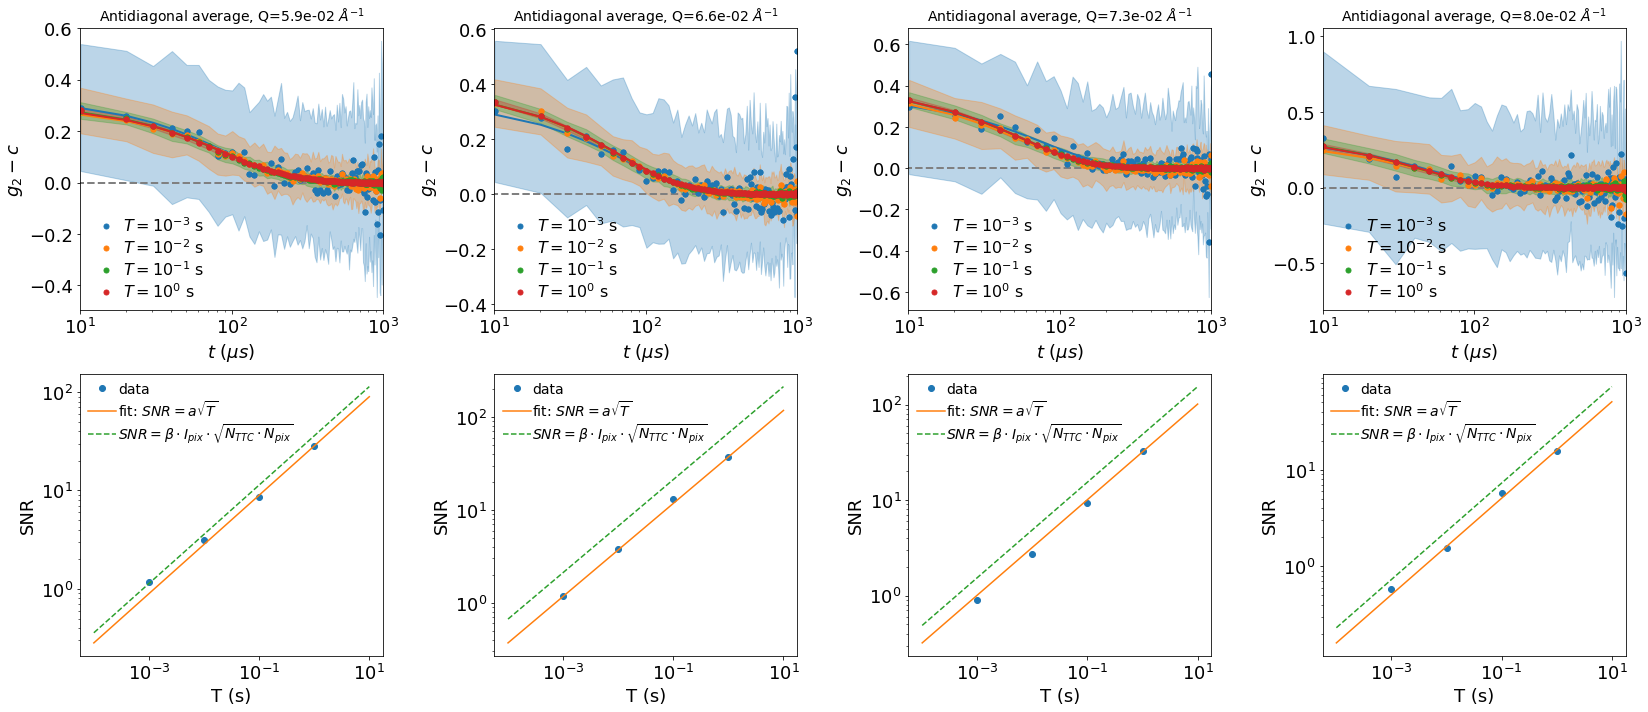

In [140]:
ttcs = [ttc_av1000, ttc_av100, ttc_av10, ttc_av] # average ttc:s to include
n_ttc = np.array([1e2, 1e3, 1e4, 1e5]) # no of ttc:s in each average above
nq = 4 # no of q

fit_func = exponential

tt = np.linspace(0, n_frames*exp_time/1e-6, n_frames)

########################################################
  
fig, axs = plt.subplots(2, nq, figsize=(23,10))
    
for i in range(nq): # for different q

    axs[0, i].hlines(y=0, xmin=0, xmax=1e4, lw=2, color='grey',ls='--')

    snr = np.empty((len(ttcs),))
    for l in range(len(ttcs)): # for the each ttc included

        ttc_fit = ttcs[l]
        bg = np.mean(ttc_fit[i, 80:100,0:20][ttc_fit[i, 80:100,0:20] != 0]) # mean long-time background
        box = ttc_fit[i] # ttc to analyze 

        g2 = np.zeros(n_frames)
        g2_sigma = np.zeros(n_frames)
        for k in range(n_frames):
            g2[k] = np.mean(np.diagonal(box, offset=k))      # mean of the diagonal 
            g2_sigma[k] = np.std(np.diagonal(box, offset=k)) # standard deviation of the diagonal

        g2 = g2[1:]             # mean antidiagonal 
        g2_sigma = g2_sigma[1:] # antidiagonal standard deviation 
        tfit = tt[1:]           # delay time

        popt, pcov = curve_fit(fit_func, tfit[~np.isnan(g2)], g2[~np.isnan(g2)]-bg, p0=[0.3, 200], bounds=((0,0),(np.inf,np.inf))) # fit the mean anti-diagonal 
        perr = np.sqrt(np.diag(pcov))
        
        D = 1/(popt[1]*q[i]**2)*1e-18*1e6 # fitted diffusion coefficient, m^2/s      
        contrast = popt[0]                # contrast from fit
        snr[l] = (g2[0]-bg)/g2_sigma[0]   # signal-to-noise

        # display mean antidiagonals and noise levels
        l, = axs[0, i].plot(tfit, g2-bg, 'o', markersize=5, label=r'$T=10^{%.d}$ s' %np.log10(n_ttc[l]*exp_time))
        axs[0, i].fill_between(tfit, g2-bg-g2_sigma, g2-bg+g2_sigma, color=l.get_color(), alpha=0.3)
        axs[0, i].plot(tfit, g2-bg, 'o', markersize=5, color=l.get_color())
        axs[0, i].plot(tfit, fit_func(tfit, *popt), linestyle='-', color=l.get_color(), lw=2)
    axs[0, i].set_xlabel('$t ~(\mu s)$', size=18)
    axs[0, i].set_ylabel(r'$g_2-c$', size=18)
    axs[0, i].set_title(r'Antidiagonal average, Q=%.1e $\AA^{-1}$' %q[i], size=14)
    axs[0, i].set_xscale('log')
    axs[0, i].tick_params(labelsize=18)
    axs[0, i].legend(frameon=False, loc='lower left', fontsize=16, labelspacing=0.2, handletextpad=0.1, borderpad=0.1)
    axs[0, i].set_xlim([10,1e3])


#################################################
# analyze the extracted SNR and compare with analytical estimate

    import xpcs
    from integrators import *
    scans = 252
    center_x, center_y = 1069.5, 201.5 
    downsample = 10
    rois = [(8+i*1, 8+(i+1)*1)] # 10x10 binning
    roi_img = xpcs.make_roi(center_x, center_y, rois, downsample)
    frames = xpcs.make_frames('/data/visitors/nanomax/20210623/2021052608/raw/sample/tristan-%04d*' %scans, 1, roi_img, downsample) # 1 s frames
    img = xpcs.make_img(frames[0]) 
    Npix = len(roi_img[roi_img!=0]) # no of superpixels in roi
    Iq = np.sum(img[img != 0])/Npix*exp_time # ph/superpixel
    print(Npix, Iq, fit_func(tfit[0], *popt), D)

    beta = fit_func(tfit[0], *popt)
    
    # analytical SNR estimate
    def f(N, beta=beta, Ipix=Iq, Npix=Npix, Nfr = n_frames): 
        # Ipix: average intensity in ph/superpixel, tfr: time per frame in s, t_ttc: total time per ttc in s, 
        return beta * Ipix * np.sqrt(N * Npix)
  
    # fitting function for the experimental SNR including a scaling factor a
    def ffit(x, a, beta=beta, Ipix=Iq, Npix=Npix, Nfr = n_frames): 
        return a * beta * Ipix * np.sqrt(x * Npix)

    popt1, pcov1 = curve_fit(ffit, n_ttc, snr, p0=[1]) # fit the experimental SNR
    #print(popt1)

    # display SNR results
    N = np.logspace(1,6,100)
    axs[1, i].plot(n_ttc*exp_time, snr,'o', label=r'data') 
    axs[1, i].plot(N*exp_time, ffit(N, *popt1),'-', label=r'fit: $SNR=a\sqrt{T}$')
    axs[1, i].plot(N*exp_time, f(N),'--', label=r'$SNR = \beta \cdot I_{pix} \cdot \sqrt{N_{TTC} \cdot N_{pix}}$')
    axs[1, i].set_xscale('log')
    axs[1, i].set_yscale('log')
    axs[1, i].set_xlabel('T (s)', size=18)
    axs[1, i].set_ylabel(r'SNR', size=18)
    axs[1, i].tick_params(labelsize=18)
    axs[1, i].legend(frameon=False, loc='upper left', fontsize=14, labelspacing=0.2, handletextpad=0.1, borderpad=0.1)
    
fig.tight_layout()

plt.show()

## TTC plot for paper

<ipython-input-141-008fe52d9620>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ttc_av_plot[ind] = 0
<ipython-input-141-008fe52d9620>:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ttc_av[ind] = 0


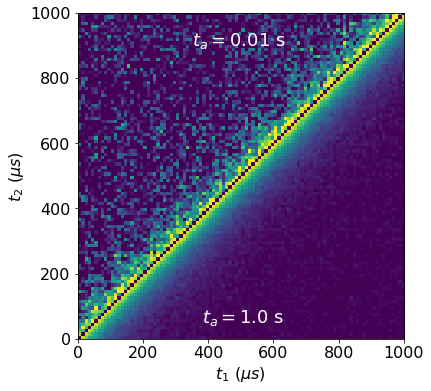

In [141]:
ttc_av_plot = ttc_av100

qval=1

factor = 1

for i in [qval]:

    # mask high values
    ttc_av_plot[i][np.diag_indices_from(ttc_av_plot[i])] = 0
    ind = [ttc_av_plot > 2]
    ttc_av_plot[ind] = 0
    bg = np.mean(ttc_av_plot[i,90:100,0:10][ttc_av_plot[i,90:100,0:10] != 0]) # mean long-time background 
    ttc_av_plot = ttc_av_plot[i]-bg
    
    ttc_av[i][np.diag_indices_from(ttc_av[i])] = 0
    ind = [ttc_av > 2]
    ttc_av[ind] = 0
    bg = np.mean(ttc_av[i,90:100,0:10][ttc_av[i,90:100,0:10] != 0]) # mean long-time background 
    tri_upper = np.triu(ttc_av[i]-bg, k=0)
    
    triu_ind = np.triu_indices(n_frames)
    ttc_av_plot[triu_ind] = tri_upper[triu_ind]

    # plot masked average ttc
    plt.figure(figsize=(6,6))
    plt.imshow(ttc_av_plot, origin='lower', extent=[0, n_frames*exp_time/1e-6, 0, n_frames*exp_time/1e-6]) 
    plt.xlabel('$t_1 ~(\mu s)$', size=16)
    plt.ylabel('$t_2 ~(\mu s)$', size=16)
    
    plt.text(350, 900, r'$t_a=%.2f$ s' %(max_acq_time/100),color='white', size=18) # Water
    plt.text(380, 50, r'$t_a=%.1f$ s' %(max_acq_time),color='white', size=18)
    #plt.text(3500, 10200, r'$t_a=%.2f$ s' %(max_acq_time/100),color='k', size=18) # dmso
    #plt.text(3800, 500, r'$t_a=%.1f$ s' %(max_acq_time),color='white', size=18)

    plt.xlim([0, n_frames*exp_time/1e-6/factor])
    plt.ylim([0, n_frames*exp_time/1e-6/factor])
    plt.clim([0, np.max(ttc_av[i]-bg)])
    plt.tick_params(labelsize=16)

plt.tight_layout

#plt.savefig('ttc_'+str(i)+'_'+sample+'_'+str(scans)+'_'+str(downsample)+'x'+str(downsample)+'_'+str(exp_time)+'s.png', dpi=300, bbox_inches='tight')# save plot

plt.show()

### SNR analysis plot for paper

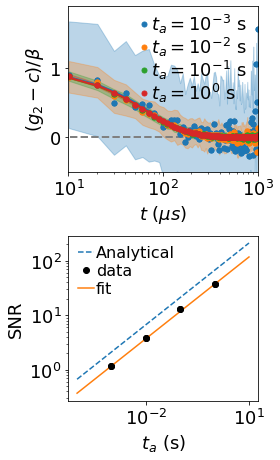

In [156]:
ttcs = [ttc_av1000, ttc_av100, ttc_av10, ttc_av]
n_ttc = np.array([1e2, 1e3, 1e4, 1e5])

fit_func = exponential

tt = np.linspace(0, n_frames*exp_time/1e-6, n_frames)

########################################################
 
fig, axs = plt.subplots(2, 1, figsize=(4,6.5))
    
for i in [qval]:

    axs[0].hlines(y=0, xmin=0, xmax=1e4, lw=2, color='grey',ls='--')

    snr = np.empty((len(ttcs),))
    for l in range(len(ttcs)):

        ttc_fit = ttcs[l]
        bg = np.mean(ttc_fit[i, 80:100,0:20][ttc_fit[i, 80:100,0:20] != 0]) # mean long-time background
        box = ttc_fit[i] # small moving box along main diagonal (moving in steps of 'step')

        g2 = np.zeros(n_frames)
        g2_sigma = np.zeros(n_frames)
        for k in range(n_frames):
            g2[k] = np.mean(np.diagonal(box, offset=k))
            g2_sigma[k] = np.std(np.diagonal(box, offset=k)) 
        g2 = g2[1:]
        g2_sigma = g2_sigma[1:]
        tfit = tt[1:]

        popt, pcov = curve_fit(fit_func, tfit[~np.isnan(g2)], g2[~np.isnan(g2)]-bg, p0=[0.3, 200], bounds=((0,0),(np.inf,np.inf)))

        perr = np.sqrt(np.diag(pcov))
        D = 1/(popt[1]*q[i]**2)*1e-18*1e6 # diffusion coefficient, m^2/s
        contrast = popt[0]
        snr[l] = (g2[0]-bg)/g2_sigma[0]

        l, = axs[0].plot(tfit, (g2-bg)/popt[0], 'o', markersize=5, label=r'$t_a=10^{%.d}$ s' %np.log10(n_ttc[l]*exp_time))
        axs[0].fill_between(tfit, (g2-bg-g2_sigma)/popt[0], (g2-bg+g2_sigma)/popt[0], color=l.get_color(), alpha=0.3)
        axs[0].plot(tfit, (g2-bg)/popt[0], 'o', markersize=5, color=l.get_color())
        axs[0].plot(tfit, fit_func(tfit, *popt)/popt[0], linestyle='-', color=l.get_color(), lw=2)
    axs[0].set_xlabel('$t ~(\mu s)$', size=18)
    axs[0].set_ylabel(r'$(g_2-c)/\beta$', size=18)
    axs[0].set_xscale('log')
    axs[0].tick_params(labelsize=18)
    axs[0].legend(frameon=False, loc='upper right', fontsize=18, labelspacing=0., handletextpad=0., borderpad=0.1, handlelength=0.8, bbox_to_anchor=[1.0,1.03])
    axs[0].set_xlim([10,1e3])
    axs[0].set_ylim([-0.5,1.9])

#################################################

    import xpcs
    from integrators import *
    scans = 252
    center_x, center_y = 1069.5, 201.5 
    downsample = 10
    rois = [(8+i*1, 8+(i+1)*1)] # 10x10 binning
    roi_img = xpcs.make_roi(center_x, center_y, rois, downsample)
    frames = xpcs.make_frames('/data/visitors/nanomax/20210623/2021052608/raw/sample/tristan-%04d*' %scans, 1, roi_img, downsample) # 1 s frames
    img = xpcs.make_img(frames[0]) 
    Npix = len(roi_img[roi_img!=0]) # no of superpixels in roi
    Iq = np.sum(img[img != 0])/Npix*exp_time # ph/superpixel
    beta = fit_func(tfit[0], *popt)
    
    def f(N, beta=beta, Ipix=Iq, Npix=Npix, Nfr = n_frames): 
        # Ipix: average intensity in ph/superpixel, tfr: time per frame in s, t_ttc: total time per ttc in s, 
        return beta * Ipix * np.sqrt(N * Npix)

    def ffit(x, a, beta=beta, Ipix=Iq, Npix=Npix, Nfr = n_frames): #, tfr = exp_time, t_ttc=n_frames*exp_time):
        return a * beta * Ipix * np.sqrt(x * Npix)

    popt1, pcov1 = curve_fit(ffit, n_ttc, snr, p0=[1])

    N = np.logspace(1,6,100)
    
    axs[1].plot(N*exp_time, f(N),'--', label=r'Analytical')
    axs[1].plot(n_ttc*exp_time, snr,'ko', label=r'data') 
    axs[1].plot(N*exp_time, ffit(N, *popt1),'-', label=r'fit')
    axs[1].plot(n_ttc*exp_time, snr,'ko') 
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel('$t_a$ (s)', size=18)
    axs[1].set_ylabel(r'SNR', size=18)
    axs[1].tick_params(labelsize=18)
    axs[1].legend(frameon=False, loc='upper left', fontsize=16, labelspacing=0.2, handletextpad=0.1, borderpad=0.1, handlelength=1.0)
    
fig.tight_layout()

plt.savefig('ttc_snr'+str(i)+'_'+sample+'_'+str(scans)+'_'+str(downsample)+'x'+str(downsample)+'_'+str(exp_time)+'s.png', dpi=300, bbox_inches='tight')# save plot

plt.show()